In [1]:
import numpy as np
import math
from sklearn.model_selection import train_test_split
from data import *
from evaluation import *
%matplotlib inline

### 加载数据集

In [2]:
data_dir = 'u.data' 
N, M, data_list, _ = load_data(file_dir=data_dir)
print(' data length: %d \n user number: %d \n item number: %d' %(len(data_list),N,M))

 data length: 100000 
 user number: 943 
 item number: 1682


### 分割数据集

In [3]:
train_list, test_list = train_test_split(data_list,test_size=0.2)
print ('train length: %d \n test length: %d' %(len(train_list),len(test_list)))

train length: 80000 
 test length: 20000


### 将 list 转换成 矩阵

In [4]:
train_mat = sequence2mat(sequence = train_list, N = N, M = M)
test_mat = sequence2mat(sequence = test_list, N = N, M = M)

### 参数设置

In [5]:
learning_rate = 0.005
lamda_regularizer = 0.1
max_iteration = 100
K = 10

### 3. 概率矩阵分解 （PMF）

 step:0 
 loss:549878.9928,mae:3.5194,rmse:3.6937,recall:0.0101,precision:0.0214
 step:10 
 loss:65590.9802,mae:0.7835,rmse:0.9955,recall:0.0297,precision:0.0631
 step:20 
 loss:62725.5550,mae:0.7580,rmse:0.9589,recall:0.0304,precision:0.0645
 step:30 
 loss:61363.4050,mae:0.7446,rmse:0.9419,recall:0.0344,precision:0.0730
 step:40 
 loss:60493.5364,mae:0.7377,rmse:0.9331,recall:0.0307,precision:0.0650
 step:50 
 loss:59870.5903,mae:0.7338,rmse:0.9282,recall:0.0307,precision:0.0650
 step:60 
 loss:59403.2692,mae:0.7317,rmse:0.9257,recall:0.0303,precision:0.0643
 step:70 
 loss:59044.5080,mae:0.7308,rmse:0.9246,recall:0.0286,precision:0.0608
 step:80 
 loss:58765.1853,mae:0.7304,rmse:0.9242,recall:0.0272,precision:0.0576
 step:90 
 loss:58545.7599,mae:0.7303,rmse:0.9243,recall:0.0262,precision:0.0557
 end. 
 loss:58387.7969,mae:0.7303,rmse:0.9246,recall:0.0248,precision:0.0525
MAE:0.7303;RMSE:0.9246;Recall:0.0248;Precision:0.0525


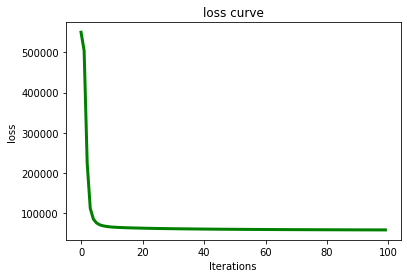

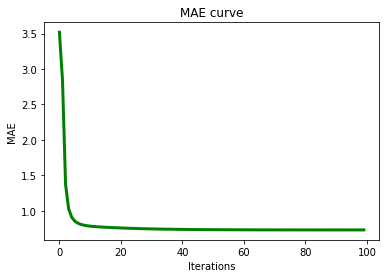

In [6]:
from pmf import *
model = pmf(train_list=train_list, 
            test_list=test_list, 
            N=N, 
            M=M,
            K=K,
            learning_rate=learning_rate, 
            lamda_regularizer=lamda_regularizer, 
            max_iteration=max_iteration)
P, Q, records_array = model.train()
print('MAE:%.4f;RMSE:%.4f;Recall:%.4f;Precision:%.4f'
      %(records_array[:,1][-1],records_array[:,2][-1],records_array[:,3][-1],records_array[:,4][-1]))

figure(values_list=records_array[:,0],name='loss')
figure(values_list=records_array[:,1],name='MAE')